<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/%5B2%5Dmnist_cnn%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%8B%E1%85%AD%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [ ]:
import tensorflow as tf

# 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # CNN에 필요한 4D 텐서 형태로 변환
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNN 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=100)

# 모델 저장
model.save('/content/drive/MyDrive/저녁ICT/day20/mnist_cnn_model.h5')



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
1875/1875 [==============================] - 18s 4ms/step - loss: 0.2182 - accuracy: 0.9336
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9761
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9824
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0405 - accuracy: 0.9878
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 1. 숫자 이미지를  읽어서 판별해 보자.

1/1 [==============================] - 0s 75ms/step
Predicted Label: 2


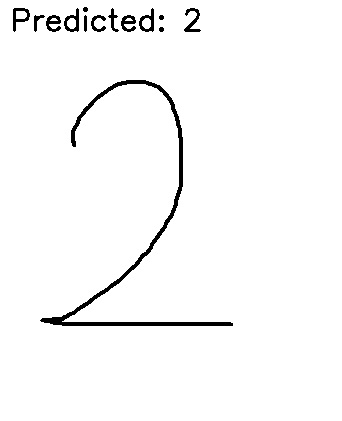

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow

# 1. TensorFlow로 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/저녁ICT/day20/mnist_cnn_model.h5')

# 2. 이미지 파일 읽기
image_path = '/content/drive/MyDrive/저녁ICT/day20/number2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load the image.")


# 이미지 전처리
resized = cv2.resize(image, (28, 28))  # mnist는 28x28 이미지를 사용
normalized = resized / 255.0

# 모델에 맞게 차원을 조정
input_data = np.expand_dims(normalized, axis=[0, -1])

# 3. 예측 수행
prediction = model.predict(input_data)
predicted_label = np.argmax(prediction, axis=1)[0]

# 4. 예측 결과 화면에 출력
print(f"Predicted Label: {predicted_label}")
cv2.putText(image, f"Predicted: {predicted_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image)




# 2. 비디오 캡처로 숫자를 입력받아 판별해보자

Google Colab은 웹 기반 환경이기 때문에 직접적으로 웹캠에 액세스할 수 없어요!!
mnist_model.h5을 다운로드 받아 로컬에서 사용하세요

In [ ]:
import cv2
import numpy as np
import tensorflow as tf


# 1. TensorFlow로 모델 불러오기
model = tf.keras.models.load_model('mnist_cnn_model.h5')

# 2. OpenCV로 웹캠에서 이미지 가져오기
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지를 그레이스케일로 변환하고 크기 조절
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28)) # mnist는 28x28 이미지를 사용
    normalized = resized / 255.0

    # 모델에 맞게 차원 조정
    input_data = np.expand_dims(normalized, axis=[0, -1])

    # 3. 예측 수행
    prediction = model.predict(input_data)
    predicted_label = np.argmax(prediction, axis=1)[0]

    # 4. 예측 결과 화면에 출력
    cv2.putText(frame, f"Predicted: {predicted_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("predicted_label",frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()